# Spaceship Titanic
**Predict which passengers are transported to an alternate dimension**

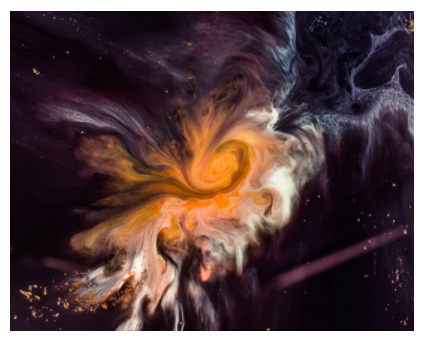


**train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.**
- **PassengerId** :- A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger                     is travelling with and pp is their number within the group. People in a group are often family members, but                     not always.
- **HomePlanet** :- The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** :- Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.                       Passengers in cryosleep are confined to their cabins.
- **Cabin** :- The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for                    Port or S for Starboard.
- **Destination** :- The planet the passenger will be debarking to.
- **Age** :- The age of the passenger.
- **VIP** :- Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** :- Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** :- The first and last names of the passenger.
- **Transported** :- Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. 
Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.
   - **PassengerId** - Id for each passenger in the test set.
   - **Transported** - The target. For each passenger, predict either True or False.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)

### Reading Data 

In [ ]:
def read_data(path) :
    df = pd.read_csv(path)
    return df

In [ ]:
train_df = read_data('../input/spaceship-titanic/train.csv')
test_df = read_data('../input/spaceship-titanic/test.csv')
sample_submission=read_data('../input/spaceship-titanic/sample_submission.csv')

In [ ]:
train_df.head()

In [ ]:
train_df.info()

In [ ]:
train_df.describe().T

In [ ]:
train_df.describe(include='O').T

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.duplicated().sum()

### Correlation matrix

In [ ]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,cmap='plasma',square=False,lw=2,annot=True,cbar=True);
    plt.show()  

In [ ]:
corrMat(train_df)

### Pandas_Profiling  module 

#### Generates profile reports from a pandas DataFrame.
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [ ]:
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [ ]:
profile=ProfileReport(train_df, minimal=True,explorative=True)
profile.to_file('titanic.html')

In [ ]:
profile

In [ ]:
train_df=pd.read_csv('../input/spaceship-titanic/train.csv')

In [ ]:
train_df

## Data Wrangling

In [ ]:
def drop_columns(df,col):
    df.drop(columns= col,axis=1,inplace=True)
    return df

In [ ]:
# drop PassengerId,Name columns
drop_columns(train_df,['PassengerId','Name','Cabin'])
drop_columns(test_df,['PassengerId','Name','Cabin'])

## EDA & Visualization

### Target

In [ ]:
train_df.Transported.value_counts()

In [ ]:
sns.countplot(train_df.Transported)

### 1. Univariate

In [ ]:
def feature_analysis(df,col,i):
    if df[col].dtype == 'object':
        print(f'column name is :- {col}')
        print(df[col].value_counts())
        sns.countplot(df[col],ax=ax[i])
    else:
        print(f'column name is :- {col}')
        print(df[[col]].describe().T)
        sns.distplot(df[col],ax=ax[0,i])
        sns.boxplot(df[col],ax=ax[1,i])

- Categorical Features 

In [ ]:
cat_cols=['HomePlanet', 'CryoSleep','VIP', 'Destination']
fig,ax=plt.subplots(1,len(cat_cols),figsize=(18,6))
plt.xticks(rotation=45)
for i,col in enumerate(cat_cols):
    feature_analysis(train_df,col,i)
    print('_'*50)
    plt.xticks(rotation=45)


- Numerical Features

In [ ]:
num_cols=['RoomService','Age','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig,ax=plt.subplots(2,len(num_cols),figsize=(18,6))
for i,col in enumerate(num_cols):
    feature_analysis(train_df,col,i)
    print('_'*50)

### 2. Bivariate

In [ ]:
def bivariate(df,col1,col2,i):
    if df[col1].dtype == 'object':
        print(df.groupby(col1)[col2].value_counts(normalize=True))
        sns.barplot(data=df,x=col1,y=col2,ax=ax[i])
    else:
        sns.boxplot(data=df,x=col2,y=col1,ax=ax[i])
        

1. Categorical Features

In [ ]:
fig,ax=plt.subplots(1,len(cat_cols),figsize=(18,6))
plt.xticks(rotation=45)
for i,col1 in enumerate(cat_cols):
    col2='Transported'
    bivariate(train_df,col1,col2,i)
    print('_'*50)
    plt.xticks(rotation=45)

2. Numerical_Features

In [ ]:
fig,ax=plt.subplots(1,len(num_cols),figsize=(18,6))
for i,col1 in enumerate(num_cols):
    col2='Transported'
    bivariate(train_df,col1,col2,i)


## Null Values

In [ ]:
def Null_values(df,col):
    df[col].fillna(df[col].mode()[0],inplace=True)
    return df

In [ ]:
train_df.columns

In [ ]:
cols=['HomePlanet', 'CryoSleep', 'Destination','VIP','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
for col in cols:
    Null_values(train_df,col)
    Null_values(test_df,col)   # for test data

In [ ]:
train_df.isnull().sum()

#### Age

In [ ]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

In [ ]:
train_df.isnull().sum()

**Age never equal zeros .. so we deal with zeros values**

In [ ]:
train_df[train_df['Age']==0]

In [ ]:
train_df[train_df['Age']==0]['Transported'].value_counts()

In [ ]:
train_df[train_df['Age']==0]['Age']=train_df['Age'].mean()

In [ ]:
# for test data
test_df[test_df['Age']==0]['Age']=test_df['Age'].mean()

## Data Preprocessing

**1. Encoding**

- Label Encoding

In [ ]:
mapping_dict={True:1,False:0}
cols=['Transported','CryoSleep','VIP']
for col in cols:
    train_df[col]=train_df[col].map(mapping_dict)    

In [ ]:
cols=['CryoSleep','VIP']
for col in cols:
    test_df[col]=test_df[col].map(mapping_dict)    

- Hot Encoding

In [ ]:
train_df=pd.get_dummies(train_df,columns=['HomePlanet','Destination'],drop_first=True)
test_df=pd.get_dummies(test_df,columns=['HomePlanet','Destination'],drop_first=True)
train_df.head()

**2. Splitting**

In [ ]:
x=train_df.drop(columns='Transported',axis=1)
y=train_df.Transported

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.15,random_state=42)


In [ ]:
x_train.shape ,y_train.shape ,x_test.shape,y_test.shape

**3. Scaling**

In [ ]:
num_cols

In [ ]:
scalar= StandardScaler()

x_train[num_cols] = scalar.fit_transform(x_train[num_cols])
test_df[num_cols] = scalar.fit_transform(test_df[num_cols])

## Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [ ]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='sigmoid'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*50)

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_depth=40,min_samples_leaf=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

In [ ]:
from sklearn.model_selection import cross_validate
c_val = cross_validate(model, x_train, y_train, cv = 12, scoring = ('accuracy', 'recall', 'precision'))


In [ ]:
c_val['test_accuracy'].mean()